In [102]:
#random forest shahed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.base import BaseEstimator, ClassifierMixin

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from sklearn.pipeline import Pipeline

In [154]:
df = pd.read_csv("ClassicHit.csv")


In [190]:
df = pd.read_csv("ClassicHit.csv")
df = data.drop_duplicates()
df.fillna(data.mean(), inplace=True)
df

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,0
1,1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,0
2,1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,0
3,1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,0
4,1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,18
15146,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,18
15147,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,18
15148,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,18


In [192]:
label_encoder = LabelEncoder()
df['Genre'] = label_encoder.fit_transform(df['Genre'])
df

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Genre
0,1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40,0
1,1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43,0
2,1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12,0
3,1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47,0
4,1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47,18
15146,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18,18
15147,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25,18
15148,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8,18


In [194]:

column_to_drop=["Genre"]

X = df.drop(column_to_drop, axis=1) 
y = df["Genre"]          
feature_names = X.columns.tolist()
X

,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,1987,206413,4,0.616,0.511,6,-15.894,1,0.0279,0.03840,0.000000,0.1500,0.604,132.015,40
1,1987,236653,4,0.770,0.459,1,-17.453,1,0.0416,0.11200,0.003430,0.1450,0.963,133.351,43
2,1987,291173,4,0.593,0.816,9,-7.293,1,0.0410,0.00449,0.000032,0.0896,0.519,99.978,12
3,1989,193560,4,0.861,0.385,2,-10.057,1,0.0341,0.15400,0.000000,0.1230,0.494,117.913,47
4,1992,185960,4,0.622,0.876,10,-6.310,1,0.0305,0.01930,0.006840,0.0987,0.867,104.970,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15145,1994,306226,4,0.679,0.659,1,-10.826,0,0.0269,0.07710,0.000004,0.3160,0.528,154.171,47
15146,1995,228373,4,0.692,0.737,10,-7.042,1,0.0512,0.25400,0.017400,0.1120,0.808,105.754,18
15147,2004,226826,4,0.733,0.730,0,-11.056,1,0.0479,0.04240,0.000101,0.0282,0.840,146.213,25
15148,2007,560466,4,0.696,0.378,5,-16.181,0,0.0797,0.44400,0.019400,0.0850,0.551,97.677,8


In [197]:
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns found: {categorical_cols}")

Categorical columns found: Index([], dtype='object')


In [203]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) 

In [205]:


X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled)
model = RandomForestClassifier()



Accuracy: 0.538817310868847
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.20      0.27       156
           1       0.42      0.33      0.37       136
           2       0.50      0.33      0.40       167
           3       0.42      0.47      0.44       130
           4       0.61      0.75      0.68       140
           5       0.46      0.28      0.35       115
           6       0.09      0.04      0.05        77
           7       0.63      0.31      0.41        62
           8       0.67      0.70      0.68       156
           9       0.60      0.62      0.61       184
          10       0.53      0.85      0.65       732
          11       0.59      0.61      0.60       151
          12       0.28      0.12      0.16       164
          13       0.69      0.69      0.69       144
          14       0.56      0.35      0.43        88
          15       0.45      0.39      0.42       160
          16       0.55      

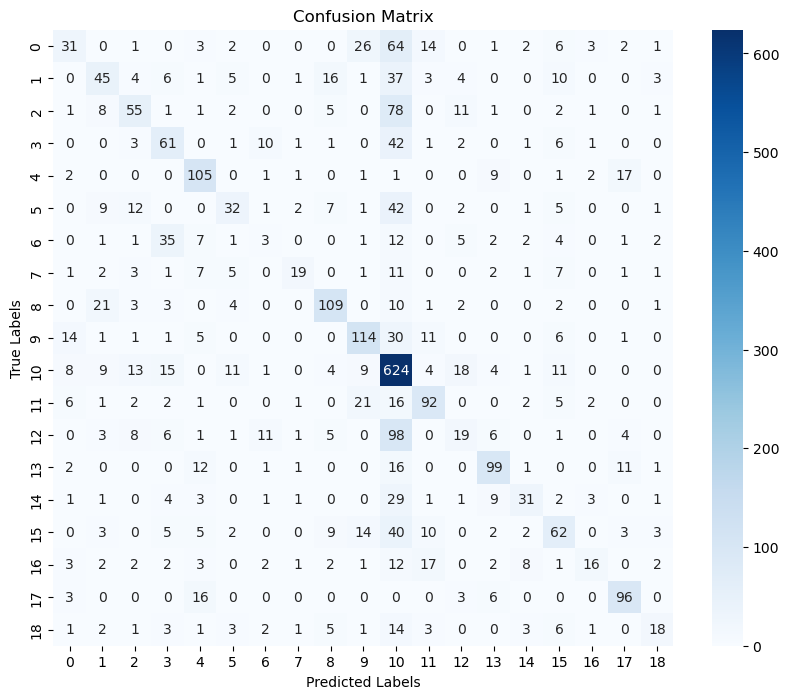

In [201]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy: 0.9095709570957096
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.88       156
           1       0.96      0.91      0.94       137
           2       0.97      0.87      0.92       166
           3       0.89      0.85      0.87       130
           4       0.93      0.98      0.95       140
           5       0.94      0.85      0.89       115
           6       0.90      0.79      0.84        78
           7       0.98      0.84      0.90        62
           8       0.93      0.97      0.95       156
           9       0.95      0.95      0.95       184
          10       0.83      0.99      0.90       734
          11       0.92      0.95      0.93       151
          12       0.94      0.68      0.79       164
          13       0.91      0.95      0.93       144
          14       0.95      0.90      0.92        88
          15       0.99      0.89      0.94       160
          16       1.00     

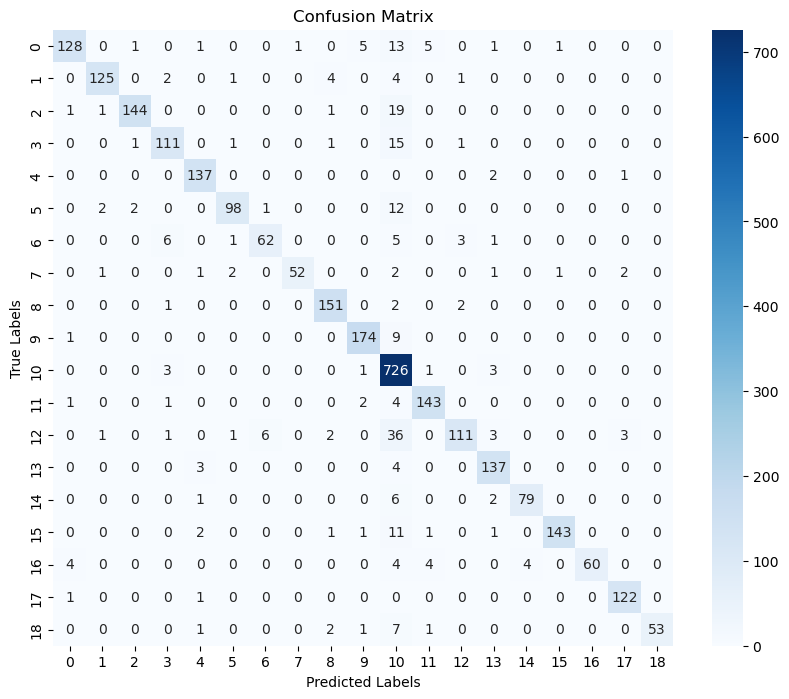

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
final_model = RandomForestClassifier(
        max_depth=None, 
        max_features='sqrt', 
        min_samples_split=10, 
        n_estimators=200, 
        random_state=42,n_jobs=-1
    )
final_model.fit(X, y)

y_pred = final_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\an

Stacking Accuracy Without Tuning: 0.9248
Blending Accuracy Without Tuning: 0.9160
Stacking Accuracy With Tuning: 0.9342
Blending Accuracy With Tuning: 0.9252
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       731
           1       0.93      0.95      0.94       732
           2       0.91      0.92      0.92       732
           3       0.94      0.89      0.91       732
           4       0.97      0.98      0.97       732
           5       0.94      0.94      0.94       731
           6       0.88      0.95      0.91       732
           7       0.98      0.99      0.99       732
           8       0.95      0.95      0.95       732
           9       0.91      0.91      0.91       732
          10       0.76      0.65      0.70       732
          11       0.93      0.90      0.92       731
          12       0.87      0.85      0.86       732
          13       0.98      0.97      0.97       732
          14       0.95      0.

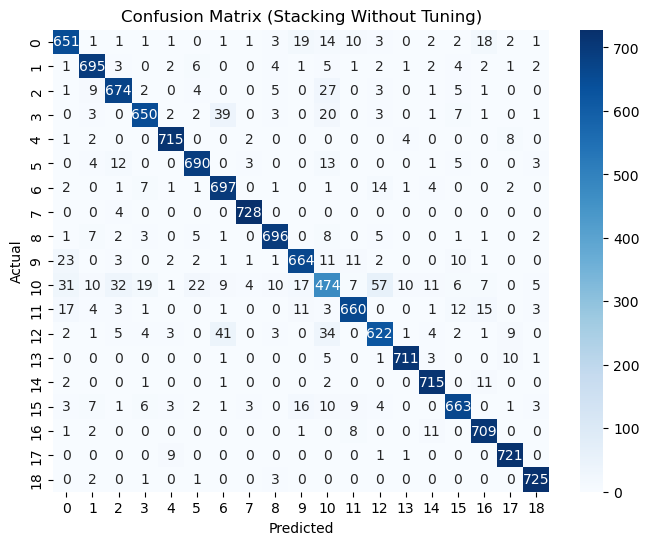

In [209]:
#staking and blending




file_path = 'Pre_process_music_genre.csv'
data = pd.read_csv(file_path)


data = data.drop_duplicates() 
data.fillna(data.mean(), inplace=True) 

X = data.drop(columns=["Genre"])  
y = data["Genre"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  

smote = SMOTE(random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


base_models_without_tuning = [
    ("xgb", XGBClassifier()),
    ("knn", KNeighborsClassifier()),
    ("adaboost", AdaBoostClassifier()),
]


stacking_model_without_tuning = StackingClassifier(
    estimators=base_models_without_tuning,
    final_estimator=RandomForestClassifier( ),
    cv=5,
)
stacking_model_without_tuning.fit(X_train, y_train)


xgb_without_tuning = base_models_without_tuning[0][1]
knn_without_tuning = base_models_without_tuning[1][1]
adaboost_without_tuning = base_models_without_tuning[2][1]

xgb_without_tuning.fit(X_train, y_train)
knn_without_tuning.fit(X_train, y_train)
adaboost_without_tuning.fit(X_train, y_train)

xgb_proba_without_tuning = xgb_without_tuning.predict_proba(X_test)
knn_proba_without_tuning = knn_without_tuning.predict_proba(X_test)
adaboost_proba_without_tuning = adaboost_without_tuning.predict_proba(X_test)

blended_proba_without_tuning = (
    xgb_proba_without_tuning + knn_proba_without_tuning + adaboost_proba_without_tuning
) / 3
blended_predictions_without_tuning = np.argmax(blended_proba_without_tuning, axis=1)


param_xgb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
}
param_knn = {"n_neighbors": [3, 5, 7, 9]}
param_adaboost = {"n_estimators": [50, 100, 150]}

xgb_search = RandomizedSearchCV(
    base_models_without_tuning[0][1], param_xgb, cv=3, n_iter=10, random_state=42
)
knn_search = RandomizedSearchCV(
    base_models_without_tuning[1][1], param_knn, cv=3, n_iter=10, random_state=42
)
adaboost_search = RandomizedSearchCV(
    base_models_without_tuning[2][1], param_adaboost, cv=3, n_iter=10, random_state=42
)

xgb_search.fit(X_train, y_train)
knn_search.fit(X_train, y_train)
adaboost_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
best_knn = knn_search.best_estimator_
best_adaboost = adaboost_search.best_estimator_


base_models_with_tuning = [
    ("xgb", best_xgb),
    ("knn", best_knn),
    ("adaboost", best_adaboost),
]


stacking_model_with_tuning = StackingClassifier(
    estimators=base_models_with_tuning,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5,
)
stacking_model_with_tuning.fit(X_train, y_train)


xgb_proba_with_tuning = best_xgb.predict_proba(X_test)
knn_proba_with_tuning = best_knn.predict_proba(X_test)
adaboost_proba_with_tuning = best_adaboost.predict_proba(X_test)

blended_proba_with_tuning = (
    xgb_proba_with_tuning + knn_proba_with_tuning + adaboost_proba_with_tuning
) / 3
blended_predictions_with_tuning = np.argmax(blended_proba_with_tuning, axis=1)


stacking_predictions_without_tuning = stacking_model_without_tuning.predict(X_test)
stacking_predictions_with_tuning = stacking_model_with_tuning.predict(X_test)


stacking_accuracy_without_tuning = accuracy_score(y_test, stacking_predictions_without_tuning)
blending_accuracy_without_tuning = accuracy_score(y_test, blended_predictions_without_tuning)

stacking_accuracy_with_tuning = accuracy_score(y_test, stacking_predictions_with_tuning)
blending_accuracy_with_tuning = accuracy_score(y_test, blended_predictions_with_tuning)

print(f"Stacking Accuracy Without Tuning: {stacking_accuracy_without_tuning:.4f}")
print(f"Blending Accuracy Without Tuning: {blending_accuracy_without_tuning:.4f}")
print(f"Stacking Accuracy With Tuning: {stacking_accuracy_with_tuning:.4f}")
print(f"Blending Accuracy With Tuning: {blending_accuracy_with_tuning:.4f}")



print(classification_report(y_test, stacking_predictions_without_tuning))


print(classification_report(y_test, blended_predictions_without_tuning))


print(classification_report(y_test, stacking_predictions_with_tuning))


print(classification_report(y_test, blended_predictions_with_tuning))


conf_matrix_without_tuning = confusion_matrix(y_test, stacking_predictions_without_tuning)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_without_tuning,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking Without Tuning)")
plt.show()


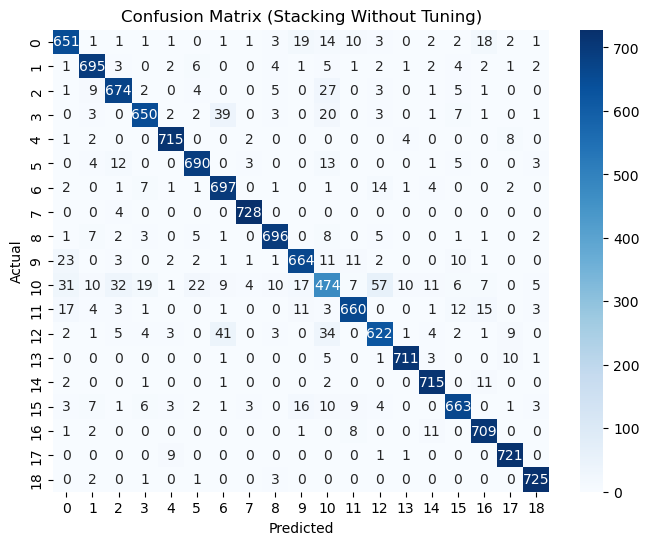

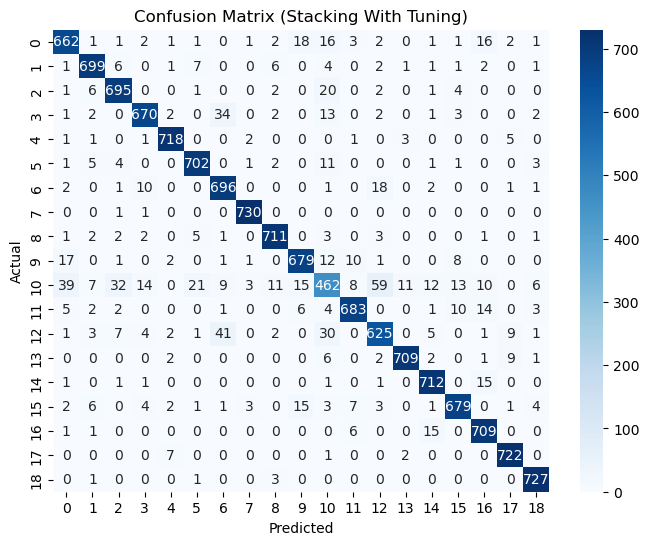

In [211]:
# Confusion Matrix for Stacking Without Tuning
conf_matrix_without_tuning = confusion_matrix(y_test, stacking_predictions_without_tuning)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_without_tuning,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking Without Tuning)")
plt.show()
# Confusion Matrix for Stacking Without Tuning
conf_matrix_with_tuning = confusion_matrix(y_test, stacking_predictions_with_tuning)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_with_tuning,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Stacking With Tuning)")
plt.show()


In [213]:
#tanvir lime

import lime
from lime import lime_tabular

# Get feature names from the original DataFrame 'X'
feature_names = X.columns

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names,  # Use feature names from the original DataFrame
    class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10','11','12','13', '14','15','16','17','18'],
    mode='classification'
)

# **Choose one of your trained models to assign to the 'model' variable**
# For example, if you want to explain the Stacking Classifier With Tuning:
model = stacking_model_with_tuning
# Or, if you want to explain the Blending With Tuning:
# model = lambda x: blended_proba_with_tuning  # Blending doesn't have a direct predict_proba, so we create a lambda function

# Now 'model' is defined and can be used in explain_instance
exp = explainer.explain_instance(
    data_row=X_test[0],  # Use X_test[0] to get the first row as a NumPy array
    predict_fn=model.predict_proba
)

exp.show_in_notebook(show_table=True)

Selected Features: ['Year', 'Duration', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Valence', 'Popularity']
Best Hyperparameters: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 19}
Accuracy of Optimized Decision Tree: 0.5187
Training Accuracy: 0.5560
Test Accuracy: 0.5187

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       733
           1       0.56      0.40      0.46       734
           2       0.39      0.36      0.37       734
           3       0.42      0.60      0.49       734
           4       0.72      0.72      0.72       734
           5       0.43      0.48      0.45       733
           6       0.33      0.27      0.29       734
           7       0.65      0.57      0.61       734
           8       0.67      0.69      0.68       734
           9       0.54      0.63      0.58       734
        

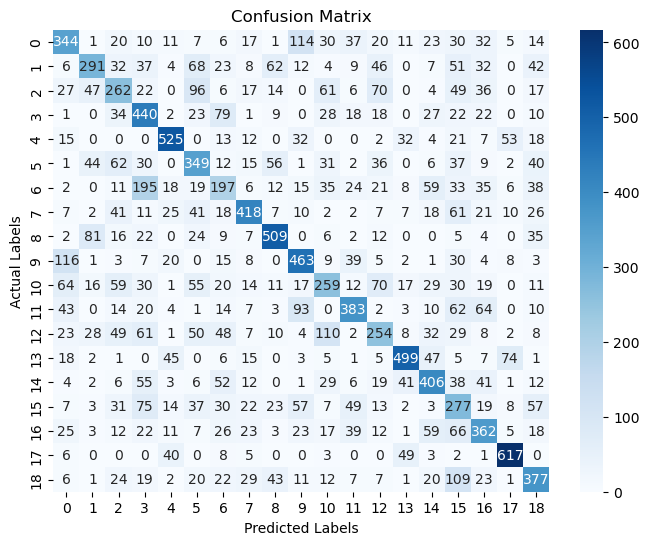

In [125]:
#tanvir  decesion tree

file_path = 'Pre_process_music_genre.csv'
data = pd.read_csv(file_path)
# 1. Handle Missing Values (if any)
data = data.dropna()  # Drop rows with missing values

# 2. Separate Features and Target
X = data.drop(columns=["Genre"])  # All columns except 'Genre' are features
y = data["Genre"]  # 'Genre' is the target

# 3. Feature Selection: Use SelectKBest to keep top features
selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]  # Get feature names
X = pd.DataFrame(X_new, columns=selected_features)

# 4. Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

# 6. Hyperparameter Tuning using GridSearchCV
param_grid = {
    "criterion": ["gini"],
    "max_depth": [10],
    "min_samples_split": [19],
    "min_samples_leaf": [2],
    "ccp_alpha": [0.0],  # Cost Complexity Pruning
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

# 7. Evaluate on Test Data
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print Results
print(f"Selected Features: {list(selected_features)}")
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy of Optimized Decision Tree: {accuracy:.4f}")

# 8. Training and Test Accuracy
train_accuracy = best_tree.score(X_train, y_train)
test_accuracy = best_tree.score(X_test, y_test)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# 9. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# # 10. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=best_tree.classes_, yticklabels=best_tree.classes_)

# Add labels, title, and formatting
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()


Original dataset shape: (12120, 15), (12120,)
Resampled dataset shape: (55765, 15), (55765,)
Accuracy after oversampling: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.39      0.39       156
           1       0.49      0.37      0.42       137
           2       0.40      0.54      0.46       166
           3       0.42      0.51      0.46       130
           4       0.72      0.69      0.70       140
           5       0.32      0.40      0.36       115
           6       0.18      0.18      0.18        78
           7       0.39      0.40      0.40        62
           8       0.68      0.60      0.64       156
           9       0.61      0.66      0.64       184
          10       0.69      0.54      0.61       734
          11       0.60      0.58      0.59       151
          12       0.25      0.26      0.25       164
          13       0.67      0.73      0.70       144
          14       0.39      0.53     

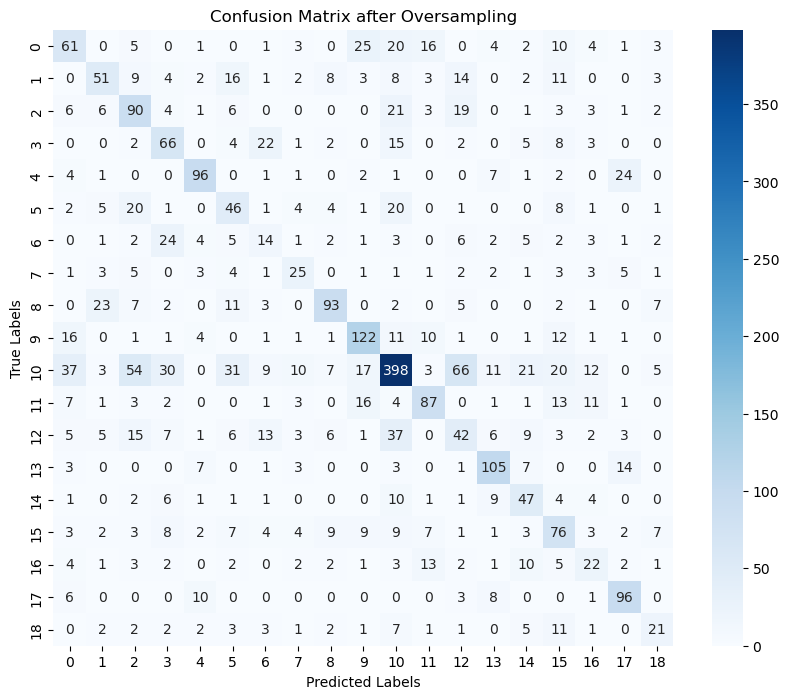

Accuracy: 0.55

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.24      0.31       156
           1       0.47      0.35      0.40       137
           2       0.47      0.39      0.43       166
           3       0.45      0.52      0.48       130
           4       0.67      0.70      0.68       140
           5       0.43      0.27      0.33       115
           6       0.27      0.17      0.20        78
           7       0.60      0.34      0.43        62
           8       0.68      0.67      0.67       156
           9       0.57      0.65      0.61       184
          10       0.58      0.80      0.67       734
          11       0.62      0.58      0.60       151
          12       0.32      0.16      0.22       164
          13       0.67      0.71      0.69       144
          14       0.54      0.51      0.52        88
          15       0.44      0.46      0.45       160
          16       0.47      0.28      0.3

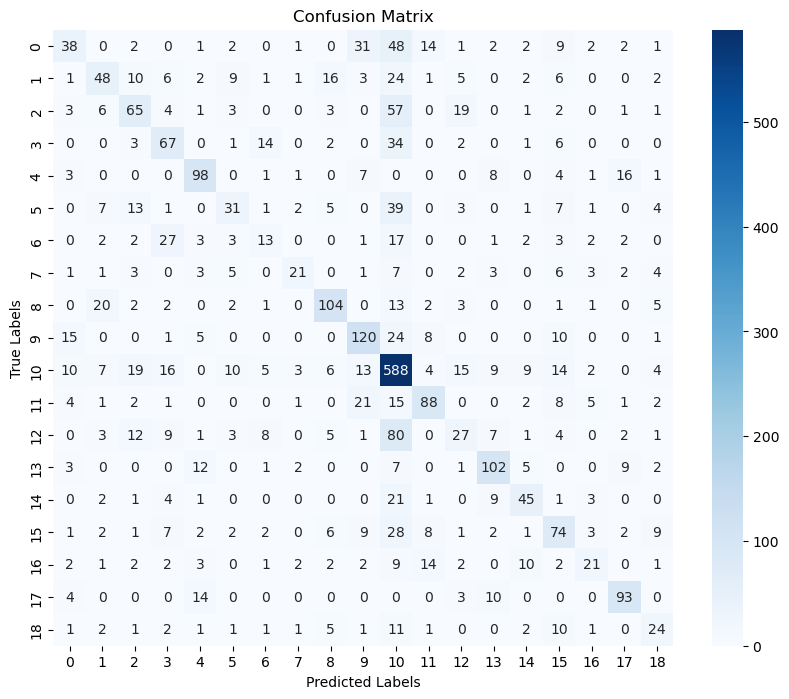

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:23:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'subsample': 0.5, 'reg_lambda': 3, 'reg_alpha': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Accuracy: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.24      0.31       156
           1       0.53      0.39      0.45       137
           2       0.51      0.45      0.48       166
           3       0.47      0.54      0.50       130
           4       0.67      0.74      0.71       140
           5       0.46      0.31      0.37       115
           6       0.29      0.19      0.23        78
           7       0.60      0.42      0.50        62
           8       0.68      0.68      0.68       156
           9       0.60      0.65      0.62       184
          10       0.58      0.79      0.67       734
          11       0.60      0.56      0.58       151
          12       0.30      0.16      0.21       164
          13 

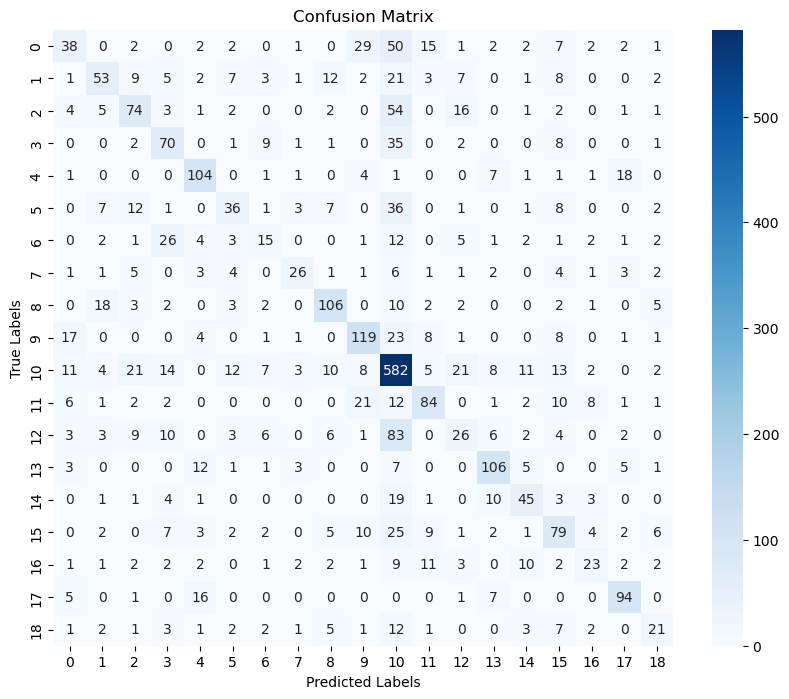

In [128]:
##sujana xgboost


# Loading the dataset
df = pd.read_csv('Pre_process_music_genre.csv')

# Separate features and target variable
X = df.drop('Genre', axis=1)  
y = df['Genre']

# Encode target labels 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42,stratify=y)

# Applying BorderlineSMOTE oversampling methods
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')

# Apply the oversampling technique to the training data
X_resampled, y_resampled = borderline_smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

# Train the XGBoost classifier using the resampled dataset
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
xgb_classifier.fit(X_resampled, y_resampled)

# Step 4: Make predictions
y_pred = xgb_classifier.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after oversampling: {accuracy:.2f}')

# Convert numeric predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display classification report and confusion matrix
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix after Oversampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 3: Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # For multi-class classification
    num_class=len(np.unique(y_encoded)), 
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    random_state=42
)
xgb_classifier.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = xgb_classifier.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Convert numeric predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display classification report and confusion matrix
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Step 2: Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42,stratify=y)

# Step 5: Define the model
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_encoded)),
    random_state=42,
    use_label_encoder=False
)

# Step 6: Expand the hyperparameter grid
param_dist = {
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.5, 0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

# Step 7: Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=30,  # More iterations to explore more combinations
    scoring='accuracy',
    cv=5,  # More cross-validation folds for stability
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Step 8: Fit the model
random_search.fit(X_train, y_train)

# Step 9: Evaluate the best model
print(f"Best Parameters: {random_search.best_params_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Convert numeric predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display classification report and confusion matrix
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Original dataset shape: (12120, 15), (12120,)
Resampled dataset shape: (55176, 15), (55176,)
Accuracy: 0.29

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.09      0.08       160
           1       0.17      0.20      0.19       129
           2       0.16      0.16      0.16       160
           3       0.12      0.14      0.13       132
           4       0.20      0.18      0.19       153
           5       0.09      0.10      0.09       130
           6       0.03      0.05      0.04        77
           7       0.02      0.03      0.03        69
           8       0.20      0.13      0.16       147
           9       0.11      0.09      0.10       179
          10       0.80      0.73      0.76       765
          11       0.23      0.19      0.21       161
          12       0.16      0.11      0.13       152
          13       0.13      0.11      0.12       141
          14       0.05      0.08      0.06        79
   

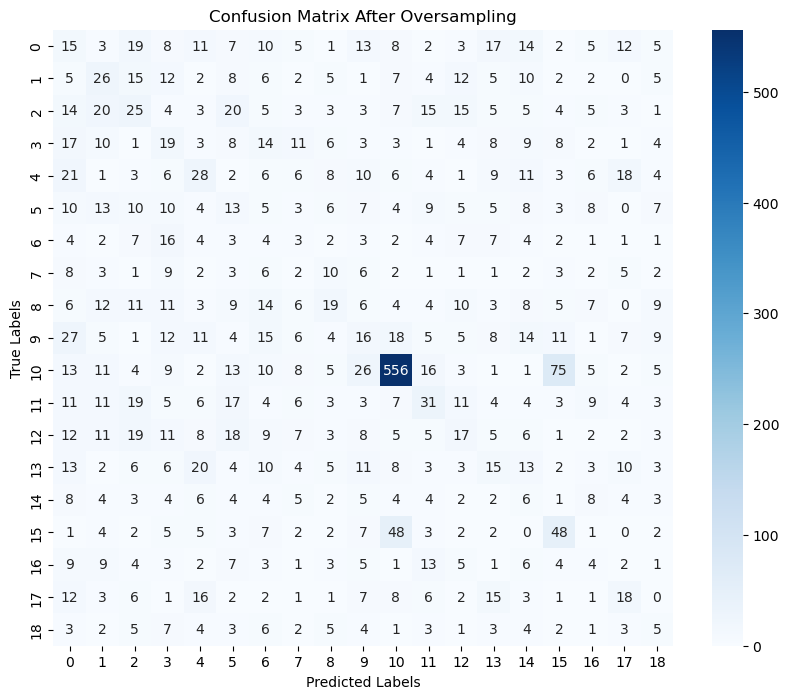

Accuracy: 0.31

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.24      0.14       160
           1       0.12      0.19      0.15       129
           2       0.11      0.15      0.13       160
           3       0.13      0.17      0.15       132
           4       0.10      0.09      0.10       153
           5       0.08      0.05      0.07       130
           6       0.02      0.01      0.02        77
           7       0.04      0.01      0.02        69
           8       0.19      0.14      0.16       147
           9       0.14      0.09      0.11       179
          10       0.64      0.92      0.75       765
          11       0.20      0.11      0.14       161
          12       0.11      0.07      0.09       152
          13       0.06      0.03      0.04       141
          14       0.02      0.01      0.02        79
          15       0.26      0.13      0.18       144
          16       0.00      0.00      0.0

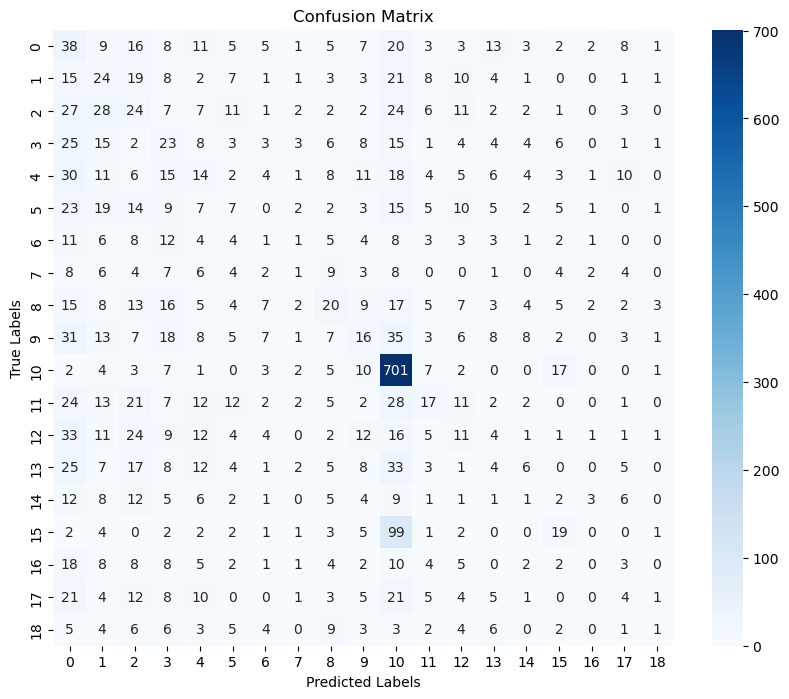

Best Parameters from RandomizedSearchCV: {'weights': 'distance', 'n_neighbors': 6, 'metric': 'cosine', 'leaf_size': 10}
Accuracy: 0.8434
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1100
           1       0.84      0.86      0.85      1100
           2       0.75      0.81      0.78      1101
           3       0.81      0.86      0.84      1101
           4       0.90      0.91      0.91      1101
           5       0.82      0.85      0.83      1100
           6       0.82      0.87      0.84      1101
           7       0.90      0.96      0.93      1101
           8       0.91      0.92      0.91      1100
           9       0.83      0.84      0.83      1101
          10       0.67      0.29      0.40      1101
          11       0.87      0.87      0.87      1100
          12       0.74      0.74      0.74      1101
          13       0.89      0.92      0.90      1101
          14       0.87      

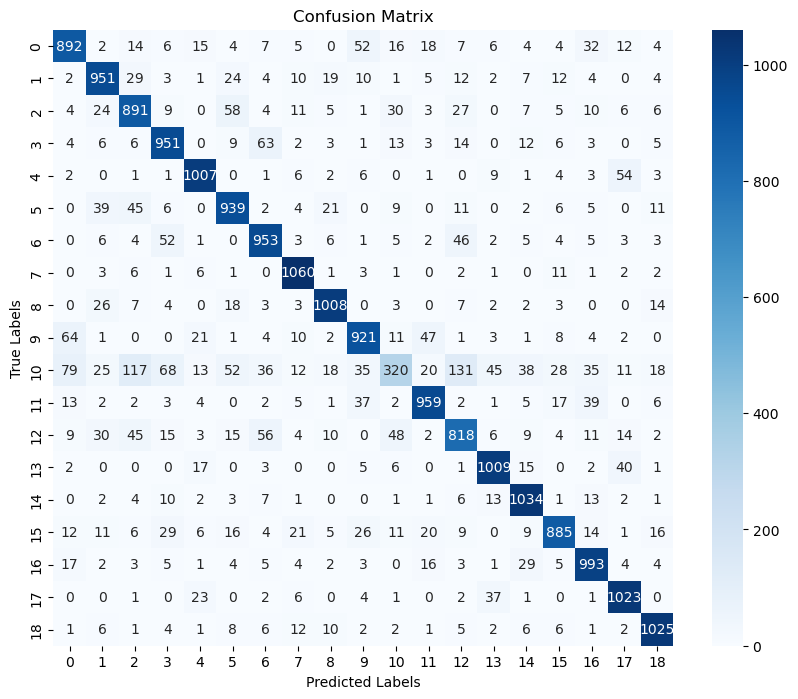

In [215]:
#sujana knn


# Loading the dataset
df = pd.read_csv('Pre_process_music_genre.csv')

# Separate features and target variable
X = df.drop('Genre', axis=1)  
y = df['Genre']

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


oversampler = BorderlineSMOTE(random_state=42, kind='borderline-1')

# Apply the oversampling technique to the training set
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

print(f"Original dataset shape: {X_train.shape}, {y_train.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

# Initialize the KNN classifier with default parameters
knn = KNeighborsClassifier()

# Train the KNN classifier on the resampled dataset
knn.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Convert numeric predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display classification report and confusion matrix
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix After Oversampling')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Initialize the KNN classifier with default parameters
knn = KNeighborsClassifier()

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Convert numeric predictions back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Display classification report and confusion matrix
target_names = [str(label) for label in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=target_names))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE  # For handling imbalanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import numpy as np

# Assuming your data is already loaded into `X` (features) and `y` (target)

# Handle missing values if any (using mean imputation)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Handle class imbalance using SMOTE (oversampling minority class)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Apply scaling to features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN model
knn = KNeighborsClassifier()

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_neighbors': np.arange(3, 50, 1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'cosine'],
    'leaf_size': np.arange(10, 50, 5),  # This controls the speed and accuracy of the KNN algorithm
}

# Perform RandomizedSearchCV (faster than GridSearchCV)
random_search = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Output the best parameters found
best_params = random_search.best_params_
print(f"Best Parameters from RandomizedSearchCV: {best_params}")

# Train the KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [86]:
#redwan svm


url = "Pre_process_music_genre.csv"  # Replace with your dataset URL or file path
df = pd.read_csv(url)

X = df.drop('Genre', axis=1)  # Features
y = df['Genre']  # Target variable
X = X.fillna(X.mean())  # Handle missing values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

param_grid = {
    'C': [1],
    'kernel': ['rbf'],
    'gamma': [ 0.1],
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='accuracy', cv=3, verbose=2,n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")
model = SVC(**best_params)
model.fit(X_train_balanced, y_train_balanced)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 45.71%
Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.36      0.33       160
           1       0.32      0.38      0.35       129
           2       0.33      0.49      0.40       160
           3       0.41      0.45      0.43       132
           4       0.72      0.68      0.70       153
           5       0.31      0.30      0.30       130
           6       0.16      0.19      0.18        77
           7       0.28      0.33      0.31        69
           8       0.58      0.67      0.62       147
           9       0.49      0.62      0.55       179
          10       0.70      0.42      0.52       765
          11       0.61      0.56      0.58       161
          12       0.20      0.24      0.22       152
          13       0.56      0.62      0.59       141
          14       0.40      0.44

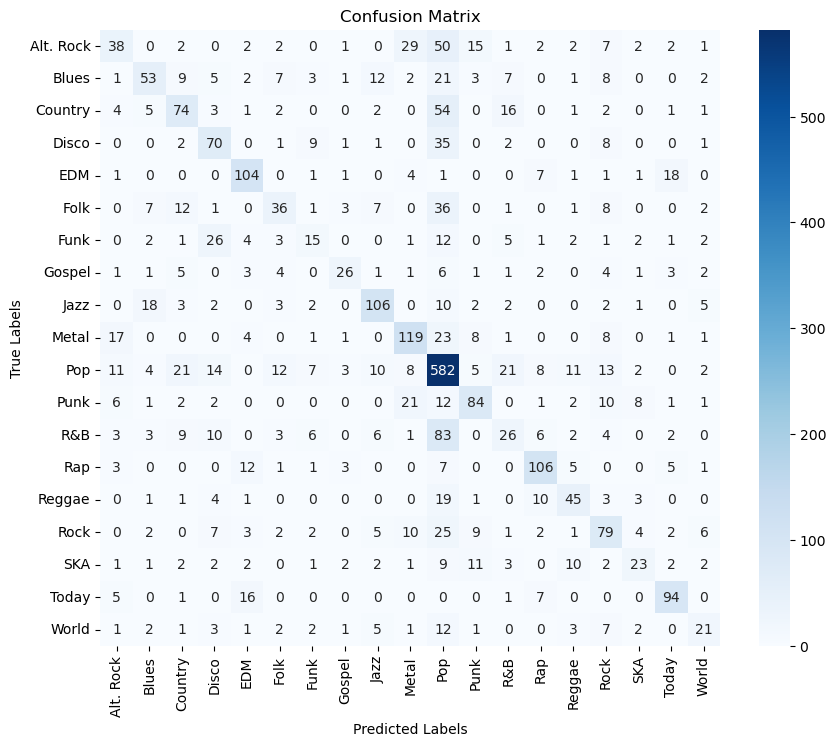

In [134]:
#redwan adaboost


dataset_path = 'Pre_process_music_genre.csv'

data = pd.read_csv(dataset_path)
print("Dataset loaded successfully")
print(data.head())
print(data.columns)

# Check for missing values
print("Missing values in dataset:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data = data.dropna()

# Separate features and target
X = data.drop(columns=['Genre'])  # Use 'Genre' as the target column
y = data['Genre']

# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X, drop_first=True)

# Perform feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)
print("Class imbalance handled using SMOTE")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets")

# Initialize the Random Forest as the base estimator
rf_base = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Initialize the AdaBoost classifier with the Random Forest base estimator
adaboost = AdaBoostClassifier(estimator=rf_base, n_estimators=50, learning_rate=0.1, random_state=42)

# Train the model
adaboost.fit(X_train, y_train)
print("Model training completed")

# Make predictions
y_pred = adaboost.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Dataset loaded successfully
   Year  Duration  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
0  1987    206413               4         0.616   0.511    6   -15.894     1   
1  1987    236653               4         0.770   0.459    1   -17.453     1   
2  1987    291173               4         0.593   0.816    9    -7.293     1   
3  1989    193560               4         0.861   0.385    2   -10.057     1   
4  1992    185960               4         0.622   0.876   10    -6.310     1   

   Speechiness  Acousticness  Instrumentalness  Liveness  Valence    Tempo  \
0       0.0279       0.03840          0.000000    0.1500    0.604  132.015   
1       0.0416       0.11200          0.003430    0.1450    0.963  133.351   
2       0.0410       0.00449          0.000032    0.0896    0.519   99.978   
3       0.0341       0.15400          0.000000    0.1230    0.494  117.913   
4       0.0305       0.01930          0.006840    0.0987    0.867  104.970   

   Popularity  Genre  

C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model training completed
Accuracy: 58.78%
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54       701
           1       0.51      0.46      0.48       746
           2       0.50      0.47      0.48       695
           3       0.55      0.56      0.55       738
           4       0.70      0.76      0.73       748
           5       0.42      0.53      0.47       759
           6       0.52      0.45      0.48       709
           7       0.71      0.67      0.69       759
           8       0.78      0.68      0.72       744
           9       0.67      0.60      0.63       718
          10       0.45      0.45      0.45       752
          11       0.67      0.63      0.65       750
          12       0.41      0.33      0.37       733
          13       0.70      0.74      0.72       719
          14       0.67      0.73      0.70       663
          15       0.41      0.50      0.45       726
          16    

C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:49:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:49:37] WARNING: C:\buildkite-agent\bui

Stacking Accuracy Without Tuning: 0.9256
Blending Accuracy Without Tuning: 0.9159
Stacking Accuracy With Tuning: 0.9342
Blending Accuracy With Tuning: 0.9252

Classification Report (Stacking Without Tuning):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       731
           1       0.93      0.95      0.94       732
           2       0.92      0.91      0.91       732
           3       0.93      0.90      0.92       732
           4       0.97      0.98      0.97       732
           5       0.94      0.94      0.94       731
           6       0.89      0.95      0.92       732
           7       0.98      0.99      0.99       732
           8       0.95      0.95      0.95       732
           9       0.91      0.91      0.91       732
          10       0.75      0.66      0.70       732
          11       0.94      0.90      0.92       731
          12       0.87      0.86      0.86       732
          13       0.97      0.97  

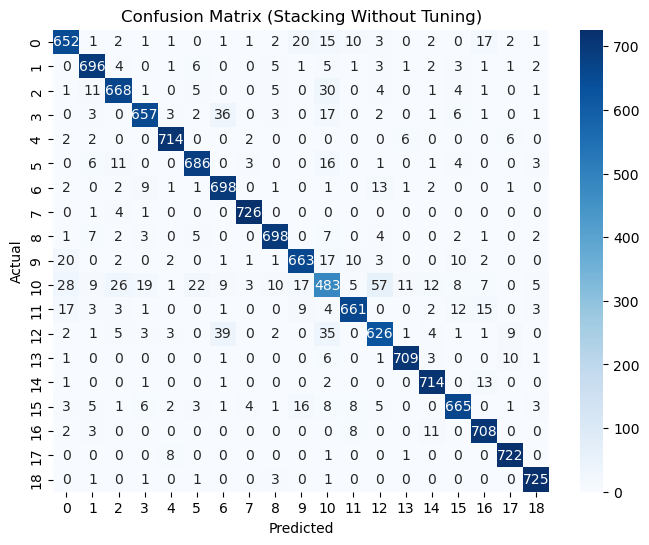

In [64]:
pip install lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     -------- ---------------------------- 61.4/275.7 kB 812.7 kB/s eta 0:00:01
     ------------------- ------------------ 143.4/275.7 kB 1.2 MB/s eta 0:00:01
     ------------------------------- ------ 225.3/275.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283842 sha256=8cf379614dd8fef277e800697a97aec681bb925299ff0e5ae366ee68898ddfa1
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Note: you may need to restart the kernel to use updated packages.
